In [48]:
import math
from typing import Tuple

def slope_of_line(pointa: Tuple[float, float], pointb: Tuple[float, float]):
    try:
        return (pointb[1] - pointa[1]) / (pointb[0] - pointa[0])
    except ZeroDivisionError:
        return math.inf

def is_intersection(linea: Tuple[Tuple[float, float]], lineb: Tuple[Tuple[float, float]], get_point=False):

    # get line rep y = a + mx

    m_a = slope_of_line(linea[0], linea[1])
    a_a = linea[0][1] - m_a * linea[0][0]

    m_b = slope_of_line(lineb[0], lineb[1])
    a_b = lineb[0][1] - m_b * lineb[0][0]

    print(m_a,a_a,m_b,a_b)

    # check for vertical lines
    if m_a == math.inf:
        x_inter = linea[0][0]
        y_inter = a_b + m_b * x_inter
    elif m_b == math.inf:
        x_inter = lineb[0][0]
        y_inter = a_a + m_a * x_inter
    elif m_a == m_b:
        print("here")
        return False
    else:
        print("here")
        x_inter = (a_a-a_b)/(m_b-m_a)
        y_inter = a_a + m_a * x_inter

    print(x_inter, y_inter)
    print(linea)
    print(lineb)
    # check if intersection point is on line segment
    check = (
                round(min(linea[0][0], linea[1][0]), 2) <= round(x_inter, 2) <= round(max(linea[0][0], linea[1][0]), 2) 
                and round(min(lineb[0][0], lineb[1][0]), 2) <= round(x_inter, 2) <= round(max(lineb[0][0], lineb[1][0]), 2)
                and round(min(linea[0][1], linea[1][1]), 2) <= round(y_inter, 2) <= round(max(linea[0][1], linea[1][1]), 2)
                and round(min(lineb[0][1], lineb[1][1]), 2) <= round(y_inter, 2) <= round(max(lineb[0][1], lineb[1][1]), 2)
            )
    if not check:
        return False
    else:
        # should point be returned
        if get_point:
            return (x_inter, y_inter)
        else:
            # print(f"there is an intersection between: {linea} (wall) and {lineb} (whisker). Intersection point {(x_inter, y_inter)}")
            return True

In [49]:
linea = ((50,98), (59,3))
lineb = ((54,64.8), (52,64.8))

is_intersection(linea, lineb)

-10.555555555555555 625.7777777777777 -0.0 64.8
here
53.14526315789474 64.79999999999995
((50, 98), (59, 3))
((54, 64.8), (52, 64.8))


True

In [22]:
def relative_delta(angle_degrees: float, radius: float):
    """
    Returns the coordinates (x, y) on circle with radius for a given angle in degrees.
    Gives us the relative position. Center at rob_x, rob_y
    """
    # Ensure the angle is within the range 0 to 360
    angle_degrees = angle_degrees % 360

    # Convert degrees to radians
    angle_radians = math.radians(angle_degrees)
    print(angle_radians)

    dx = radius * math.cos(angle_radians)
    dy = radius * math.sin(angle_radians)

    return dx, dy

In [34]:
relative_delta(180, 2)

3.141592653589793


(-2.0, 2.4492935982947064e-16)

In [82]:
from collections import deque
import random

x = deque(maxlen=1)
y = deque(maxlen=3)

x.append((1,2))
x.append((2,3))
x.append((4,5))
y.append(tuple(x))
x.append((5,6))
y.append(tuple(x))

print(x)
print(y)

random.sample(y, 2)

deque([(5, 6)], maxlen=1)
deque([((4, 5),), ((5, 6),)], maxlen=3)


[((4, 5),), ((5, 6),)]

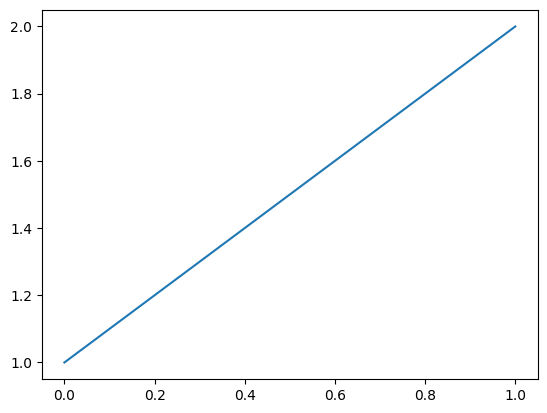

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0,1], [1,2])

In [7]:
import math

def unit_circle_coordinates(angle_degrees, radius):
    """
    Returns the coordinates (x, y) on the unit circle for a given angle in degrees.
    
    :param angle_degrees: Angle in degrees (0 to 360)
    :return: Tuple (x, y) representing the coordinates on the unit circle
    """
    # Ensure the angle is within the range 0 to 360
    angle_degrees = angle_degrees % 360

    # Convert degrees to radians
    angle_radians = math.radians(angle_degrees)

    # Calculate x and y coordinates
    x = radius * math.cos(angle_radians)
    y = radius * math.sin(angle_radians)

    return x, y

# Example usage:
angle = 225
coordinates = unit_circle_coordinates(angle, 6)
print(f"The coordinates on the unit circle for {angle}° are: {coordinates}")


The coordinates on the unit circle for 225° are: (-4.242640687119286, -4.242640687119285)


In [ ]:
def relative_delta(angle_degrees: float, radius: float):
    """
    Returns the coordinates (x, y) on circle with radius for a given angle in degrees.
    Gives us the relative position. Center at rob_x, rob_y
    """
    # Ensure the angle is within the range 0 to 360
    angle_degrees = angle_degrees % 360

    # Convert degrees to radians
    angle_radians = math.radians(angle_degrees)

    dx = radius * math.cos(angle_radians)
    dy = radius * math.sin(angle_radians)

    return dx, dy

def steer_rob_dir(current_dir: float, delta: float):
    if current_dir + delta > 360:
        return current_dir + delta - 360
    elif current_dir + delta < 0:
        return 360 + (current_dir + delta)
    else:
        return current_dir + delta

In [15]:
relative_delta(225, math.sqrt(13))

(-2.5495097567963927, -2.5495097567963922)

In [12]:
378 % 360

18

In [19]:
math.degrees(math.atan2(-2,-3)) % 360

213.69006752597977

In [24]:
def relative_angle(center_point, satellite_point):
    """
    returns the angle between a center point and a satellite point. helper function to redirect robot to target
    """

    dx, dy = (satellite_point[0] - center_point[0]) , (satellite_point[1] - center_point[1])

    return math.degrees(math.atan2(dy, dx)) % 360

relative_angle((50, 90), (70,10))

284.03624346792645

In [1]:
(108 - 180) % 360

288

In [3]:
from typing import Tuple
import math

def distance_between_point(pointa: Tuple[float, float], pointb: Tuple[float, float]):
    if pointa is None or pointb is None or pointa is False or pointb is False:
        return math.inf
    return math.sqrt(math.pow(pointa[0]-pointb[0],2) + math.pow(pointa[1]-pointb[1],2))

In [6]:
distance_between_point((2,2), (1,1))

1.4142135623730951

In [29]:
import torch

rewards = (-18.142427735925807, -1.0, -1.0, 11.91306654162014, -1.0, -1.0, -1.0, -13.91306654162014, -15.096607227492761, -16.04498086445846, -16.80612081350708, -17.419956606196955, -17.918346658613217, -18.32614640690187, -18.662549072921188, -1.0, -1.0, 18.7326637471663, -1.0, -1.0, -1.0, -1.0, 12.576748133195977, -1.0, 15.96191540021875, -1.0, 18.239287879575713, 18.095897856135977, 17.909116810424962, 17.660243736956765, 17.319897965388723, -1.0, -1.0, -1.0, -20.681839362616618, -1.0, -1.0, -20.747680951643503, -1.0, -1.0, -1.0, -1.0, -5.253624042578643, -1.0, -1.026558475668459, -3.0559251788284527, -5.023381609395784, -6.876709866938654, -1.0, -2.5629556630594976, -1.0, -1.0, -5.645720271653175, -1.0, -1.0, -1.0, 14.389778913031265, -1.0, -1.0, -1.0, -1.0, -19.48779327027792, -19.73447452097185, -19.92678912815768, -20.07926354414883, -1.0, -20.996011423045772, -20.996519374703716, -20.996936109003514, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 4.956671036303476, -1.0, -1.0, -1.0, -1.0, 14.44238571236935, 13.899394829824963, 13.270776345566212, 12.54244285887713, 11.699056705589271, -1.0, -1.0, -1.0, 18.990271580069283, 18.988480958672348, -1.0, 17.67179877695083, 17.3865489677968, -1.0, -1.0, 7.995717663969103, -1.0, -1.0, -6.319469096184015, -1.0, -2.3300483106666405, -4.538794108354608, -6.622202800188312, -8.52507216675486, -10.2172319728326, -1.0, -16.265111582758095, -1.0, -19.833538818118214, -1.0, -20.99802887243014, -20.998312615741654, -20.998539207453447, -20.998723030102035, -20.998874209818496, -1.0, 18.998874209818496, 18.998723030102035, 18.998539207453447, -1.0, -1.0, 15.071162515086144, 14.49509034940705, -1.0, -1.0, -1.0, -1.0, 2.8303716311227376, 1.2210745375828367, -1.0, -6.601991340730379, -8.063725420920939, -1.0, -1.0, -1.0, -1.0, -9.406948494790747, -1.0, -15.472774314251104, -1.0, -1.0, -20.891227455447655, -20.90497704054775, -20.916279385585582, -1.0, -20.522259779361733, -20.572667754156114, -20.61556751502428, -20.652367472337957, -20.684163130089942, -1.0, -18.763041484747077, -1.0, -15.412129709259673, -15.812454796069403, -16.17689470567852, -1.0, -1.0, -1.0, -1.0, -1.0, 11.57949749784423, -1.0, -1.0, 11.06600825261269, 10.51207096874046, -1.0, 14.618008601893152, 14.253767619300689, -1.0, -1.0, 18.915151042387365, 18.906441534526635, 18.896322337599628, -1.0, 18.53762265402858, -1.0, 16.04205846691508, -1.0, 18.327551147741282, 18.237530952925646, -1.0, -1.0, -1.0, 5.092649358616669, -1.0, -2.442156382830362, -3.8081919602232475, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 18.672738049152407, -1.0, 18.827562763719442, 18.79804504933025, -1.0, 18.699572645927006, 18.637875298355887, -1.0, -1.0, 18.55526142106777, -1.0, -1.0, 11.476456866937795, -1.0, -1.0, -1.0, -1.0, -13.54432969322064, -14.841533013143916, -1.0, -1.0, -20.82582287606995, -1.0, -20.676324654385446, -1.0, -1.0, -15.355085632681046, -16.111780348694666, -1.0, -1.0, -1.0, -0.5793284387868383, -1.0, 4.107857385760042, 2.5927470710331377, 1.0111186257351932, -0.6094392733380474, -1.0, -1.0, 9.832732072205822, -1.0, 13.64366773803178, 12.740572860923024, -1.0, 15.941553534561642, -1.0, 18.169498510278054, 17.953713508154095, 17.64509503467019, -1.0, 18.919868043558573, 18.885246051371332, -1.0, -20.885246051371332, -20.919868043558573, -1.0, -19.64509503467019, -19.953713508154095, -1.0, -20.999334754527, -1.0, -20.06872593268492, -1.0, -1.0, -19.972591673378076, -20.13475954872517, -1.0, -1.0, -20.261966166832245, -20.36343745614252, -20.445587023028637, -20.51297192990605, -20.568894827312278, -1.0, 18.568894827312278, -1.0, 18.893786618826077, 18.87890832077877, 18.860680980879728, 18.838022720262245, -1.0, -1.0, 13.074408259278997, -1.0, 6.71224788984334, -1.0, -8.71224788984334, -10.134334144429168, -1.0, -1.0, -1.0, -5.7119290000673075, -7.221059333762824, -8.621347897707835, -9.902029591434797, -11.059567532748233, -12.096161220131329, -1.0, -1.0, -1.0, -1.0, 10.469602072625094, 9.461685670338667, -1.0, -11.461685670338667, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.652318133862245, -4.064501006872256, -5.4313645665637225, -6.736044955198807, -1.0, -1.8768284832803275, -3.231896147228376, -1.0, -10.401386156979292, -11.391905862715731, -1.0, 9.391905862715731, -1.0, 2.4225964398120823, -1.0, -4.422596439812082, -5.680197670559885, -1.0, -0.7184804154321469, -1.0, 4.228982775124678, -1.0, -3.2732847778125276, -4.550832253609393, -5.785107688951413, -6.964094331142817, -1.0, 4.964094331142817, 3.7851076889514133, 2.550832253609393, -1.0, 7.350096098747528, 6.211260686156606, -1.0, -1.2321296503026815, -1.0, -8.6360222603358, -9.750319644537612, -10.772346735219202, -11.702945989173145, -1.0, -1.0, 14.481891875911344, -1.0, -1.0, 18.93631422517435, 18.926974750823945, -1.0, 18.453629549824925, 18.361299051193157, 18.243938445946576, 18.091860810822503, 17.890366805441197, 17.616434579859202, 17.23274201798741, -1.0, 18.778356267368444, 18.690125711055995, -1.0, 15.91240850645455, -1.0, 9.014929275513982, -1.0, -1.8290145760656298, -1.0, -0.17098542393437022, -1.0, 0.6210104460816144, -1.0, 1.3028174801316226, -4.363994199616043, -1.0, -3.5716367251358196, -1.0, -1.0, -1.0, 9.666922848729028, 4.580007632511519, -1.9493129067170702, -8.201500452207457, -1.0, -7.596063883804675, -1.0, -1.0, -1.0, -6.694261133768093, -10.916581450041804, -13.915722022683802, -15.925878197544886, -1.0, 13.925878197544886, -1.0, 16.267002951431554, -1.0, -1.0, -1.0, -20.985299268336618, -1.0, -1.0, -1.0, 18.985299268336618, 18.976232893464314, 18.955059517729907, 18.883134251530343, -1.0, -1.0, 106.4090536433979)

def compute_loss(rewards, gamma=0.99):
    """
        Compute the loss for an LSTM-based policy.

        Args:
            policy: The LSTM policy network (a PyTorch model).
            trajectory: A list of (state, action, reward) tuples.
            gamma: Discount factor.

        Returns:
            loss: The policy loss (scalar).
    """

    discount_factors = torch.Tensor([gamma**i for i in range(rewards.shape[1])])
    discount_matrix = torch.zeros(size=(len(discount_factors), len(discount_factors)))
    for i in range(len(discount_factors)):
        discount_matrix[i:, i] = discount_factors[:len(discount_factors)-i]
    print(discount_matrix)

    returns = torch.matmul(rewards, discount_matrix)
    return returns

In [36]:
rewards[-1:]

(106.4090536433979,)

In [41]:
r = torch.tensor(rewards[-5:]).unsqueeze(0)

print(r)

discounted_returns = compute_loss(r)

print(discounted_returns)
print(r)

tensor([[ 18.9551,  18.8831,  -1.0000,  -1.0000, 106.4090]])
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9900, 1.0000, 0.0000, 0.0000, 0.0000],
        [0.9801, 0.9900, 1.0000, 0.0000, 0.0000],
        [0.9703, 0.9801, 0.9900, 1.0000, 0.0000],
        [0.9606, 0.9703, 0.9801, 0.9900, 1.0000]])
tensor([[137.9151, 120.1616, 102.3015, 104.3450, 106.4090]])
tensor([[ 18.9551,  18.8831,  -1.0000,  -1.0000, 106.4090]])
